# 차원축소 기법의 종류들



1. PCA (linear)
2. t-SNE (non-parametric/ nonlinear)
3. Sammon mapping (nonlinear)
4. Isomap (nonlinear)
5. LLE (nonlinear)
6. CCA (nonlinear)
7. SNE (nonlinear)
8. MVU (nonlinear)
9. Laplacian Eigenmaps (nonlinear)



* 수많은 알고리즘들
* 하지만 두 개만 알면 된다.
  * PCA와 t-SNE



# t-SNE



## PCA의 한계

* PCA는 물론 좋은 차원 축소 기법

* 그러나 선형(linear) 관계밖에 찾아내지 못한다.

* 복잡한 관계는 찾아낼 수 없다.

  ​

* 더 advanced한 걸 쓰고 싶다면?

* t-SNE는 상대적으로 새롭고 더 효과적인 알고리즘이다.

  * PCA - 1933
  * t-SNE - 2008



## t-SNE란?

* t-Distributed Stochastic Neighbor Embedding

- 비선형 차원축소 (non-linear dimensionality reduction)
- 시각화를 위해 주로 사용된다.



> 기본 아이디어 : 가까운 것은 가깝게, 먼 것은 멀게!



* local approach : 원래 차원에서 가까운 데이터 포인트들을 저차원에서도 가깝게 둔다
* Global approach : 전체 데이터의 구조를 유지하려고 한다. 즉 먼 포인트들을 멀게 하려고 한다.



* t-SNE 이외의 비선형 알고리즘들은 local과 global 구조를 동시에 유지하는 데 약하다고 한다.



## t-SNE가 하는 일

* 데이터 포인트들 사이의 유사도를 통해 데이터의 패턴을 찾는다.
* 고차원의 데이터를 저차원의 공간으로 매핑하는 데 목적이 있다.
* 입력 속성들의 정보는 사라진다.
* 주로 data exploration과 시각화 방법이다.
* 클러스터링 알고리즘은 아니다.
  - 클러스터가 나뉘지는 않는다.
  - t-SNE의 결과를 클러스터링이나 분류 모델에 넣을 수는 있다.



## 쓰이는 곳

* 고차원 데이터를 다루는 어디에나 쓸 수 있다.
* 이미지 처리, NLP, 음성 처리, 유전자 데이터 등에 자주 쓰인다.



### 얼굴 표정 인식 문제

* t-SNE로 차원 축소 한 뒤

* AdaBoost, Random Forests, Logistic Regression, NN 같은 분류 알고리즘에 입력

* Preprocessing → normalization → t-SNE→ classification algorithm

* ​                      PCA      LDA    LLE     SNE    t-SNE

  SVM               73.5%  74.3%  84.7%  89.6%  90.3%

  AdaboostM2   75.4%  75.9%  87.7%  90.6%  94.5%



### MNIST

![mnist](https://lvdmaaten.github.io/tsne/examples/mnist_tsne.jpg)



https://lvdmaaten.github.io/tsne/examples/mnist_tsne.mov



### imagenet

![imagenet](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_1k.jpg)



http://cs.stanford.edu/people/karpathy/cnnembed/

### wordvec을 이용한 텍스트 비교

* 단어를 벡터화 시키는 방법인 word2vec의 결과를 t-SNE로 표현할 수 있다.



## 단점

* black box
  * 알고리즘의 작동 방식을 이해하기 어렵다.
  * 결과에서 인력 속성의 값들이 사라지므로,  결과에서 인사이트를 뽑아내기 어렵다.
* randomness
  * 돌릴 때마다 결과가 조금씩 달라질 수 있다.
  * reproducibility 문제
* 시간이 오래 걸린다.



## 조심해야 할 점

* perplexity는 데이터 포인트의 개수보다 적어야 한다. 추천은 5 ~ 50 사이
* 돌릴 때마다 결과가 다르다. random seed를 주는 것이 좋다.
* 클러스터의 크기는 표준편차나 어떤 분산으로 해석해서는 안된다. t-SNE는 너무 몰려 있는 클러스터는 퍼뜨리고 너무 퍼져 있는 클러스터는 모은다. 더 시각적으로 깨끗하고 명확하게 보여주기 위해서. 그래서 클러스터의 크기는 의미가 없다.
* 클러스터 사이의 거리는 변할 수 있다. 클러스터 사이의 거리를 서로 다른 정도라고 해석하는 것은 위험하다.
* 패턴은 노이즈 때문일 수도 있다. 다른 하이퍼파라미터로 여러번 돌려보아서 패턴이 일관성 있게 드러나는지 보는 것이 좋다.
* perplexity level에 따라서 클러스터 모양이 달라질 수 있다.



## 언제 쓸까?

* EDA : 데이터에서 패턴을 찾아내고 싶을 때
* 다른 모델의 입력으로 : classification이나 clustering 알고리즘의 입력으로

![hyperparams](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/20083812/tsne2.png)

In [2]:
%matplotlib inline

Computing PCA projection
Computing t-SNE embedding


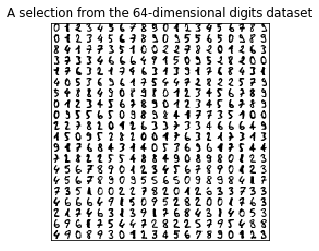

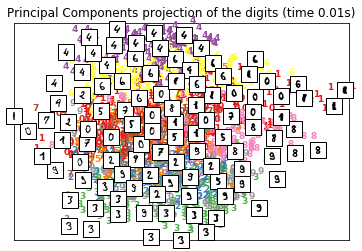

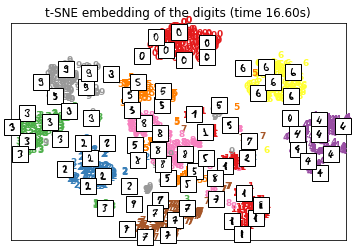

In [3]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

## 알고리즘

* t-SNE는 SNE를 개선한 것이다.

* SNE
     * 유클리디안 거리를 쓰지 말고, 조건부 확률(conditional probabilities)를 거리로 쓰자!

* x_i와 x_j의 유사도는 P(j|i)이다.
* x_i를 중심으로 하는 Gaussian distribution을 그렸을 때, x_j에서의 값이 유사도이다.
* 가까운 상대에 대해서는 P(j|i)가 높고, 멀리 있는 상대에 대해서는 낮을 것이다.

![p](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/17113403/TSN1.png)


## STEP 2

* x_i, x_j는 저차원의 포인트 y_i와 y_j로 매핑된다.

![q](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/17113456/TSN2.png)

* 저차원에서 고차원 데이터를 완벽하게 표현하면, P(j|i)와 q(j|i)는 일치해야 한다.
* 즉, 그 둘의 차이가 0이어야 한다.
* SNE는 이 차이를 최소화하려고 한다.

## STEP 3

* t-SNE와 SNE의 차이
* SNE에서는 Kullback-Leibler divergences를 이용한다.
* 더불어서, cost function을 최소화할 때 계산이 복잡하다.
* t-SNE 역시 두 conditional probability의 차이를 최소화하려고 한다.
* 하지만 t-SNE는 저차원에서 normal distribution이 아니라 t-student distribution을 쓴다.
* t-분포는 끝이 좀 더 두툼하다. -> 고차원의 공간을 저차원으로 매핑할 때 공간이 부족한 문제를 해결할 수 있다.
* 더불어서 최적화가 좀 더 쉽다고 알려져 있다.

## Step 4

* hyperparameter : student’s t-distribution의 표준편차
* 우리가 sigma를 직접 구하지는 않는다.
* 대신, perplexity를 고른다.
* perplexity : 간단하게 말해서 이웃의 수
* t-SNE의 성능은 perplexity에 따라 변하긴 해도 크게 변하진 않는다.(robust)
* perplexity 5 ~ 50이 적절하다고 알려져 있다.
* gradient descent를 이용해 최소화한다.

* 직관적으로 이해하면
* y_i와 다른 모든 y_j 사이에 스프링이 연결되어 있다고 상상하자.
* y_j들은 y_i 들은 자기로 당기거나 자기에게서 밀어버린다.
* y_i와 y_j의 거리가 원래 거리보다 멀면 당기고
* y_i와 y_j의 거리가 원래 거리보다 짧으면 민다.
